In [36]:
from theano import theano, tensor as tt
import pymc3 as pm
import pandas as pd
from sklearn import datasets
import numpy as np
from numpy import random
import pylab as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
%matplotlib inline
plt.mpl.style.use('ggplot')

In [37]:
# первая составляет нужное распределение
def posterior(t, f):
    """
    t : орел
    f : решка
    """
    return stats.beta(a=t+1, b=f+1)

# вторая рисует график плотности
def plot_pdf(dist, ax, c):
    space = np.linspace(0, 1)
    pdf = dist.pdf(space)
    ax.plot(space, pdf, c=c, alpha=.5)
    return ax

In [38]:
# Данные
true_p = .3 # Истинная вероятность получить "Орла"
random.seed(42) # для воспроизводимости данных
trials = np.random.uniform(size=100) < true_p # Бинарная переменная, где 1 это орел
# Составляем пары [t, f]
observed = np.array(list(zip(np.cumsum(trials), np.arange(1, trials.size+1) - np.cumsum(trials))))
observed[:6]

array([[0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 4],
       [2, 4]])

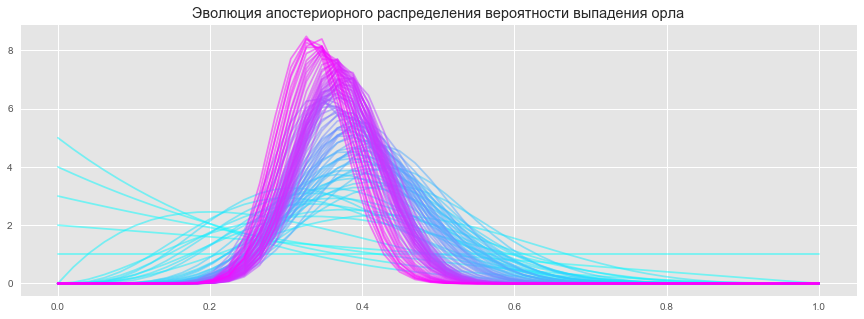

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
cmap = plt.get_cmap('cool')
plot_pdf(posterior(0, 0), ax, cmap(0))
for (t, f), c in zip(observed, np.linspace(0, 1, num=observed.shape[0])):
    plot_pdf(posterior(t, f), ax, cmap(c))
plt.title('Эволюция апостериорного распределения вероятности выпадения орла')
plt.show()

In [40]:
with pm.Model() as simple_model:
    # По соглашению все случайные переменные должны иметь уникальные имена
    # Параметры распределения надо передавать после строкового имени
    norm = pm.Normal('norm', 0, 1)

    # не подбирать параметры для MCMC метода NUTS
    step = pm.NUTS()
    trace = pm.sample(1000, step=step)
    # Обратите внимание на количество итераций в секунду: оно будет уменьшаться по мере усложнения модели

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.93it/s]


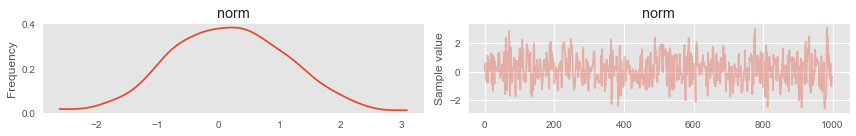

In [41]:
pm.traceplot(trace);